### Assignment 2, Part 1


In [1]:
# Importing libraries
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as py

In [2]:
# Importing data
df1 = pd.read_csv('Group_11_Question_1_Data.csv', index_col=0)

#### F-test for Equality of two variances

Under the assumption that the underlying distributions are normal:

* H<sub>0</sub>: $\sigma^2_1 = \sigma^2_2$
* H<sub>a</sub>: $\sigma^2_1 \neq \sigma^2_2$

In [3]:
def f_test(x1: pd.Series, x2: pd.Series):

    # Ensures the F statistic is greater than 1, by assigning the larger standard deviation to the numerator
    if x1.std() < x2.std():
        x1, x2 = x2, x1

    # Calculate F statistic
    F = x1.std()**2 / x2.std()**2

    # Set degrees of freedom
    kwargs = dict(dfn= (x1.size -1), dfd= (x2.size -1))

    # Find critical value of F distribution at 95% confidence level
    F_crit = stats.f.ppf(q=1-0.05, **kwargs)

    # Find p-value
    p = stats.f.pdf(F, **kwargs)
    
    print("p value:%.10f" % p)
    if F > F_crit:
        print("Reject null hypothesis >> The variances of the samples are different.")
    else:
        print("Fail to reject null hypothesis >> The variances of the samples are same.")

f_test(df1["Period 1"], df1["Period 2"])

p value:0.0000000014
Reject null hypothesis >> The variances of the samples are different.


### Distributions of Samples,

Histogram and 1-variable summary statistics

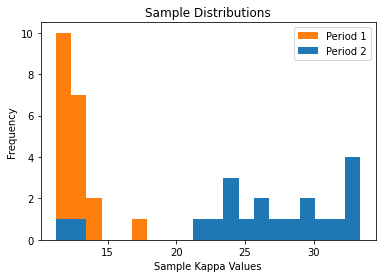

,Period 1,Period 2
count,20.000000,20.000000
mean,26.429001,12.755438
std,6.174648,1.310644
min,11.619726,11.239848
25%,23.946297,11.922177
50%,27.201267,12.534074
75%,30.982160,12.957735
max,33.417412,17.255720


In [4]:
fig, ax = plt.subplots()

ax.hist(df1, bins=20, histtype='stepfilled')
ax.legend(df1.columns)
ax.set_title('Sample Distributions')
ax.set_xlabel('Sample Kappa Values')
ax.set_ylabel('Frequency')
plt.show()

df1.describe()

QQ-plots

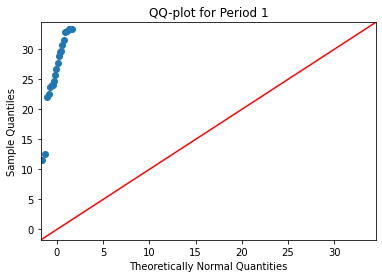

In [5]:
sm.qqplot(df1["Period 1"], line ='45')
py.xlabel('Theoretically Normal Quantities')
py.title('QQ-plot for Period 1')
py.show()

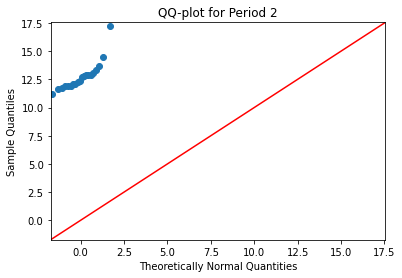

In [6]:
sm.qqplot(df1["Period 2"], line ='45')
py.xlabel('Theoretically Normal Quantities')
py.title('QQ-plot for Period 2')
py.show()

### Mann Whitney U Test

Under the criterions that the samples are continuous or ordinal

* H<sub>0</sub>: The distributions for Periods 1 and 2 are identical
* H<sub>1</sub>: The distributions for Periods 1 and 2 are different

In [7]:
def test_mannwhtneyu_hypothesis(x1, x2):
    U, p = stats.mannwhitneyu(x1, x2)

    print("p value:%.10f" % p)
    if p <0.05:
        print("Reject null hypothesis >> The distributions for Periods 1 and 2 are different")
    else:
        print("Fail to reject null hypothesis >> The distributions for Periods 1 and 2 are identical")

test_mannwhtneyu_hypothesis(df1["Period 1"], df1["Period 2"])

p value:0.0000039874
Reject null hypothesis >> The distributions for Periods 1 and 2 are different


### Kruskal-Wallis H test

* H<sub>0</sub>: The median Kappa for Periods 1 and 2 are identical
* H<sub>1</sub>: The median Kappa for Periods 1 and 2 are different

In [8]:
def test_kruskalwallish_hypothesis(x1, x2):
    H, p = stats.kruskal(x1, x2)

    print("p value:%.10f" % p)
    if p <0.05:
        print("Reject null hypothesis >> The median Kappa for Periods 1 and 2 are different")
    else:
        print("Fail to reject null hypothesis >> The median Kappa for Periods 1 and 2 are identical")

test_kruskalwallish_hypothesis(df1["Period 1"], df1["Period 2"])

p value:0.0000037358
Reject null hypothesis >> The median Kappa for Periods 1 and 2 are different
